In [1]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl  
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from sklearn import preprocessing

import warnings 
warnings.filterwarnings('ignore') 

In [2]:
df = pd.read_csv('C://Users//ariel//Downloads//Data-Collisions.csv')

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


#### Let's look at some bar charts of different features. 

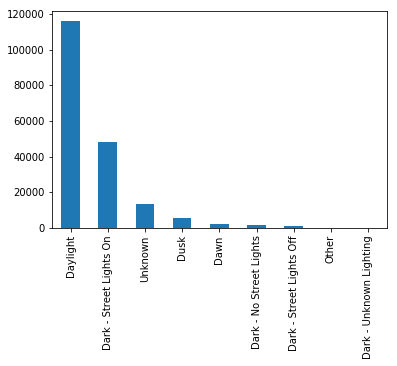

In [4]:
df['LIGHTCOND'].value_counts().plot(kind='bar')

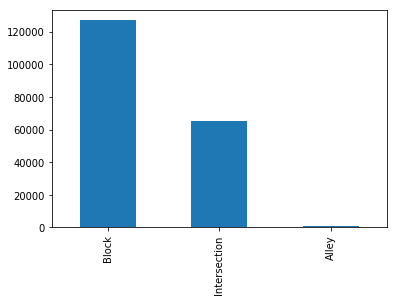

In [5]:
df['ADDRTYPE'].value_counts().plot(kind='bar')

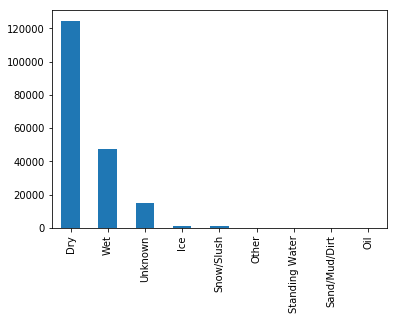

In [6]:
df['ROADCOND'].value_counts().plot(kind='bar')

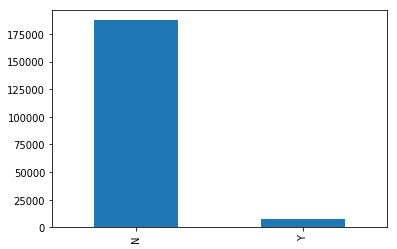

In [7]:
df['HITPARKEDCAR'].value_counts().plot(kind='bar')

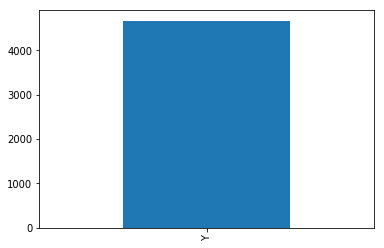

In [8]:
df['PEDROWNOTGRNT'].value_counts().plot(kind='bar')

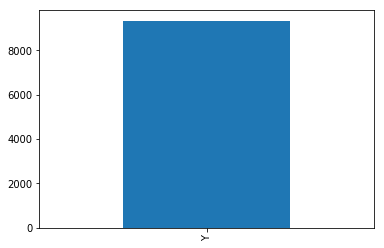

In [9]:
df['SPEEDING'].value_counts().plot(kind='bar')

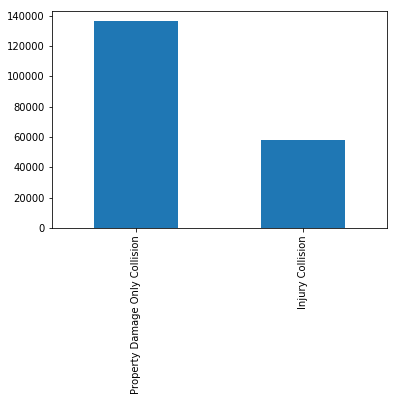

In [10]:
df['SEVERITYDESC'].value_counts().plot(kind='bar')

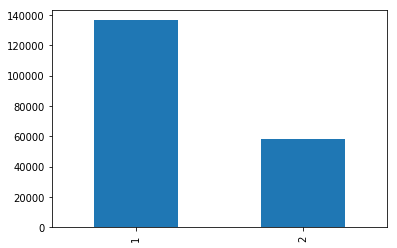

In [11]:
df['SEVERITYCODE'].value_counts().plot(kind='bar')

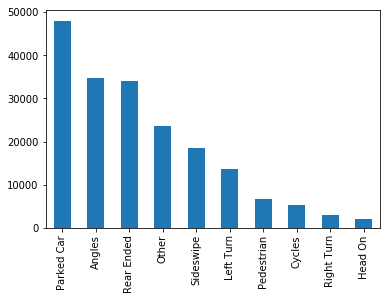

In [12]:
df['COLLISIONTYPE'].value_counts().plot(kind='bar')

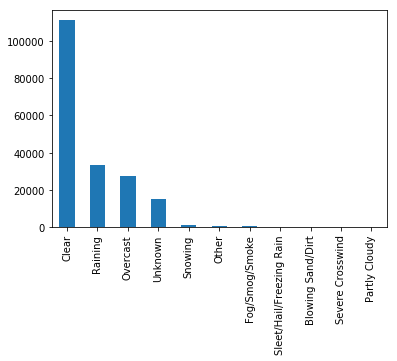

In [13]:
df['WEATHER'].value_counts().plot(kind='bar')

#### Let's resample our data so that it is balanced.

In [14]:
from sklearn.utils import resample

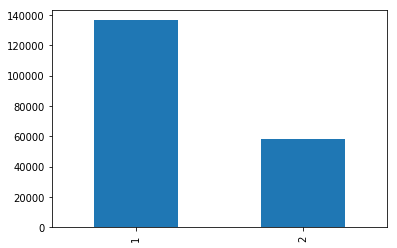

In [15]:
df['SEVERITYCODE'].value_counts().plot(kind='bar')

In [16]:
df_majority = df[df['SEVERITYCODE']==1]
df_minority = df[df['SEVERITYCODE']==2]

In [17]:
df_majority = df_majority.sample(len(df_minority), random_state=0)

df  = pd.concat([df_majority, df_minority])

df= df.sample(frac=1, random_state=0)

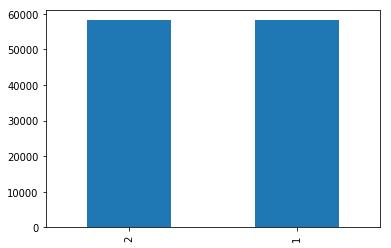

In [18]:
df['SEVERITYCODE'].value_counts().plot(kind='bar')

In [19]:
df = df[['SEVERITYCODE', 'WEATHER', 'LIGHTCOND', 'SPEEDING', 'ROADCOND']]

In [20]:
df

,SEVERITYCODE,WEATHER,LIGHTCOND,SPEEDING,ROADCOND
29959,2,Clear,Daylight,NaN,Dry
110326,1,Clear,Daylight,NaN,Dry
5970,2,Clear,Dark - Street Lights On,NaN,Dry
130027,1,Unknown,Unknown,NaN,Unknown
76480,2,Raining,Dark - Street Lights On,Y,Snow/Slush
...,...,...,...,...,...
150683,1,Overcast,Dark - Street Lights On,NaN,Wet
190034,1,Raining,Dark - Street Lights On,NaN,Wet
140202,1,Overcast,Dark - Street Lights On,NaN,Wet
31494,1,Overcast,Dark - Street Lights On,NaN,Wet


In [21]:
df.dropna(inplace=True)

#### Convert categorical data into numerical 

In [23]:
objFeatures = df.select_dtypes(include='object').columns

le = preprocessing.LabelEncoder()

for feat in objFeatures: 
        df[feat] = le.fit_transform(df[feat].astype(str))
        
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6036 entries, 76480 to 78330
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   SEVERITYCODE  6036 non-null   int64
 1   WEATHER       6036 non-null   int32
 2   LIGHTCOND     6036 non-null   int32
 3   SPEEDING      6036 non-null   int32
 4   ROADCOND      6036 non-null   int32
dtypes: int32(4), int64(1)
memory usage: 188.6 KB


In [24]:
# define x and y 

X = np.asarray(df[['WEATHER', 'LIGHTCOND', 'SPEEDING', 'ROADCOND']]) 
y =np.asarray(df['SEVERITYCODE'])

In [25]:
# normalize the dataset 

X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.94583917, -0.96620437,  0.        ,  0.2892977 ],
       [-1.01722633,  0.76848022,  0.        , -0.98847262],
       [-1.01722633, -0.96620437,  0.        ,  1.05595989],
       [-1.01722633, -0.96620437,  0.        , -0.98847262],
       [-1.01722633, -1.83354667,  0.        , -0.98847262]])

### Split train and test data 

In [26]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (4225, 4) (4225,)
Test set: (1811, 4) (1811,)


### KNN

In [27]:
# K- nearest Neighbors (KNN) 
from sklearn.neighbors import  KNeighborsClassifier 

k = 30 

neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)

Kyhat = neigh.predict(X_test) 

### Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier 
dfDataTree = DecisionTreeClassifier(criterion='entropy', max_depth=7)
dfDataTree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [29]:
DT_yhat = dfDataTree.predict(X_test)

### Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix 
LR = LogisticRegression(C=6, solver='liblinear').fit(X_train, y_train) 

LR_yhat = LR.predict(X_test)

yhat_prob = LR.predict_proba(X_test) 

### Results

In [31]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

#### KNN

In [32]:
# jaccard similarity score KNN 
jaccard_similarity_score(y_test, Kyhat)

0.5869685256764219

In [33]:
# F1-score
f1_score(y_test, Kyhat, average='macro')

0.4486820085044313

#### Decision Tree

In [34]:
#jaccard similarity score DT 
jaccard_similarity_score(y_test, DT_yhat)

0.5919381557150746

In [35]:
# F1-score
f1_score(y_test, DT_yhat, average='macro')

0.44748404888853105

#### Logistic Regression

In [36]:
#jaccard similarity score LR
jaccard_similarity_score(y_test, LR_yhat)

0.5814467145223633

In [37]:
# F1-score
f1_score(y_test, LR_yhat, average='macro')

#log loss
log_loss(y_test, yhat_prob)

0.6782701713588811